# Health Indicator & Prediction of RUL 
## Importing necessary libraries

In [531]:
import pandas as pd
import numpy as np
import scipy.signal
import scipy.stats
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, clear_output

## Load th dataset (Wind Turbine Bearing)

In [996]:
for i in range(1,51):
    a = "{0}{1}.csv".format('wind', i)
    df[i] = pd.read_csv(a)
fs = 97656
timeunit = 'day'
df.head()

,-0.41462,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.17249,-0.51730,0.17249,0.59464,5.1891,2.40150,-0.904640,-2.198100,-2.55360,2.5958,...,1.4702,2.65460,3.53320,1.49590,-1.48700,-1.1490,0.82882,-2.42090,-0.40397,1.72850
1,-0.40378,0.66616,-0.40378,1.40310,1.3002,1.93070,-0.114590,-3.635900,-1.93300,1.6074,...,3.1913,1.73600,3.05720,0.87033,-0.71264,1.4909,1.08900,-1.30230,1.68930,1.03970
2,-0.77354,1.03360,-0.77354,1.37700,-1.9042,0.98491,-0.391720,-1.855500,-0.11452,1.8980,...,3.6852,-0.52092,2.75900,-0.82532,-0.11058,4.8002,2.05150,-1.13430,3.28130,-0.54949
3,0.68663,1.62330,0.68663,-0.24489,-3.3112,1.28730,0.088097,-0.030568,0.15820,0.2991,...,3.5456,-0.74204,0.38677,-1.51950,0.14747,3.8287,2.82110,-1.65870,3.28280,-0.87209
4,3.33920,1.86470,3.33920,-3.57260,-3.3878,1.55250,2.416700,1.852000,1.31250,-1.9673,...,3.9370,-1.95670,0.43785,-0.98879,0.24411,2.3212,2.11950,-0.26178,1.34760,-1.80400


## Data Exploration

Text(0, 0.5, 'Acceleration')

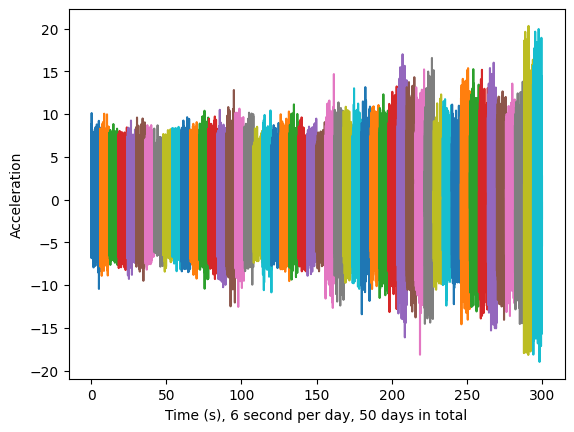

In [48]:
tstart = 0
for i in range(1,51):
    v = df[i].values
    t = tstart + (np.arange(1,len(v)))/fs
    plt.plot(t[range(1, len(t), 10)], v[range(1, len(t), 10)])
    tstart = t[-1]
plt.xlabel("Time (s), 6 second per day, 50 days in total")
plt.ylabel("Acceleration")

## Vaibration Analysis

In [ ]:
scipy.stats.kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate', *, keepdims=False)

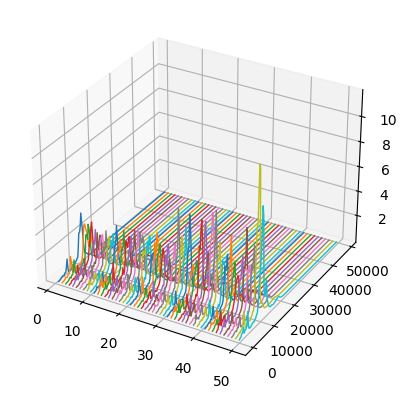

In [866]:
day = 1
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(1,51):
    v = df[i].values
    wc = 128
    #F, tt, Zxx = scipy.signal.stft(v, fs, nperseg=wc)
    F, tt, Zxx = scipy.signal.spectrogram(v, fs)
    ax.plot(day*np.ones(len(F)),F, np.sum(np.abs(Zxx),axis=1), linewidth=1)
    day = day + 1
cmap = plt.get_cmap('hot')
plt.set_cmap(cmap)
plt.show()

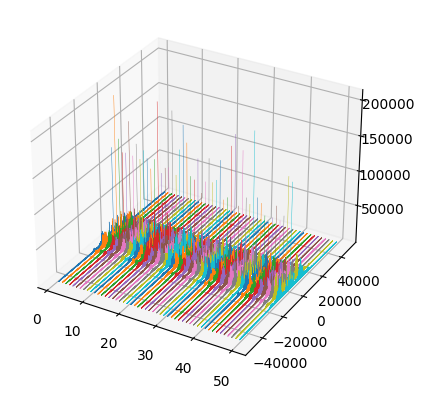

In [144]:
from scipy.fft import fft, fftfreq
day = 1
N = len(v)
T = 1 / fs
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(1,51):
    v = df[i].values
    wc = 1024
    Zxx = fft(v)
    F = fftfreq(N, T)[:N]
    ax.plot(day*np.ones(len(F)),F, np.abs(Zxx), linewidth=0.3)
    day = day + 1
plt.show()

In [998]:
for i in range(1,51):
    v = df[i].values
    F, tt, Zxx = scipy.signal.spectrogram(v, fs)
    #F, tt, Zxx = scipy.signal.stft(v, fs, nperseg=wc)
    Zx = np.sum(np.abs(Zxx),axis=1)
    dd = {'mean': [np.mean(v)],
            'std': [np.std(v)],
            'kurtosis': [scipy.stats.kurtosis(v)],
            'meansquared': [(np.mean(v**2))],
            'shapefactor': [np.sqrt(np.mean(v**2))/np.mean(np.abs(v))],
            'crestfactor': [np.max(v)/np.sqrt(np.mean(v**2))],
            'impulsefactor': [np.max(v)/np.mean(np.abs(v))],
            'impulsefactor2': [np.max(v)/np.mean(np.abs(v))**2],
            'energy': [np.sum(v**2)],
            'fmean': [np.mean(Zx)],
            'fstd': [np.std(Zx)],
             'fms': [(np.mean(Zx**2))]}
    if i == 1:
        df2 = pd.DataFrame(dd)
    else:
        df2 = pd.concat([df2, pd.DataFrame(dd)], ignore_index = True)
df2.head()

,mean,std,kurtosis,meansquared,shapefactor,crestfactor,impulsefactor,impulsefactor2,energy,fmean,fstd,fms
0,0.218728,2.103554,0.022392,4.472783,1.253927,5.214442,6.538528,3.876710,2.620760e+06,0.235009,0.607074,0.423768
1,0.346053,2.270483,-0.004392,5.274847,1.253516,4.914870,6.160870,3.362538,3.090717e+06,0.273971,0.610316,0.447545
2,0.244092,2.062148,0.019452,4.312035,1.254461,4.912971,6.163130,3.723208,2.526572e+06,0.225890,0.545215,0.348286
3,0.213710,2.008057,0.041462,4.077964,1.255580,5.286232,6.637285,4.126797,2.389422e+06,0.214141,0.535576,0.332698
4,0.215182,2.060563,0.044475,4.292223,1.255376,5.005869,6.284249,3.807905,2.514963e+06,0.225481,0.454653,0.257551


## The evolution of time and frequency domain indices over the 50 days of measurements

Also smoothing using the moving average

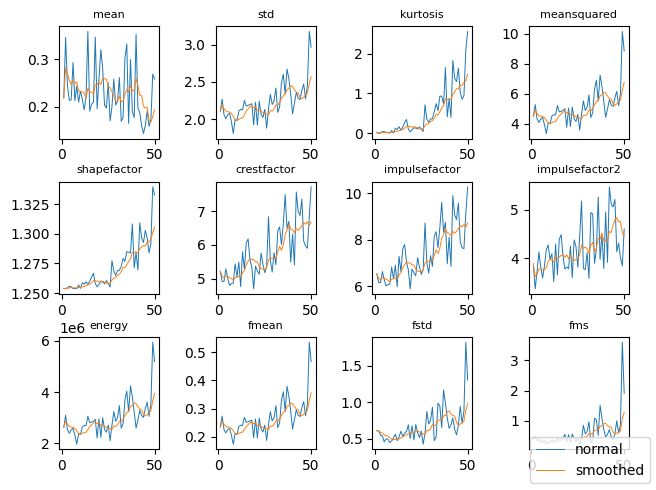

In [997]:
v = df2.values
df3 = df2.rolling(window=7, min_periods=1).mean()
vs = df3.values
Time = np.arange(1,51)
fig, ax = plt.subplots(nrows=3, ncols=4)
fig.tight_layout(pad=1.0)
i = 0
for row in ax:
    for col in row:
        if i == 11:
            col.plot(Time, v[:,i], linewidth=0.7,label="normal")
            col.plot(Time, vs[:,i], linewidth=0.7,label="smoothed")
            col.set_title(df2.columns[i], fontsize = 8)
            break
        col.plot(Time, v[:,i], linewidth=0.7)
        col.plot(Time, vs[:,i], linewidth=0.7)
        col.set_title(df2.columns[i], fontsize = 8)
        #col.legend()
        i = i + 1
lines = []
labels = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)
fig.legend(lines, labels, loc='lower right')
plt.show()

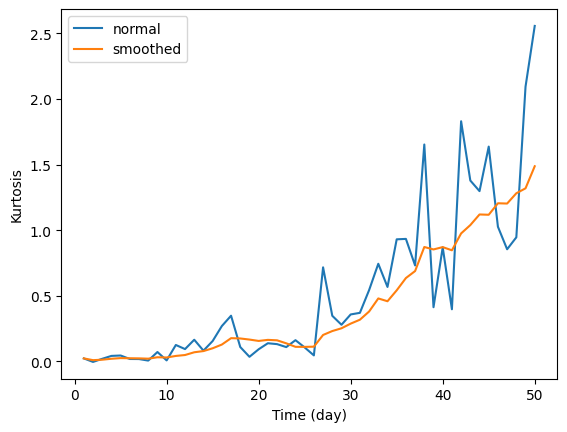

In [945]:
plt.plot(Time, v[:,2],label="normal")
plt.plot(Time, vs[:,2],label="smoothed")
plt.xlabel("Time (day)")
plt.ylabel("Kurtosis")
plt.legend()

## Feature ranking & selection

In [946]:
!pip install pymannkendall
import pymannkendall as mk

In [948]:
def monotonicity(data):
    datas = []
    for i in range(0,len(vs[1,:])-1):
        datas.append(data[i+1] - data[i])
    N = data.shape[0] 
    return np.abs(np.sum(np.sign(np.array(datas)))/(N - 1))
trainsize = 25
mcity = []
trend, h, p, z, Tau, s, var_s, slope, intercept = [], [], [], [], [], [], [], [], []
for i in range(0,len(vs[1,:])):
    result = mk.original_test(vs[:trainsize,i])
    mcity.append(monotonicity(vs[:trainsize,i]))
    #result = mk.yue_wang_modification_test(vs[:trainsize,i])
    trend.append(result.trend)
    h.append(result.h)
    p.append(result.p)
    z.append(result.z)
    Tau.append(result.Tau)
    s.append(result.s)
    var_s.append(result.var_s)
    slope.append(result.slope)
    intercept.append(result.intercept)
    #pd.concat([trend, result.trend], ignore_index = True)

<BarContainer object of 12 artists>

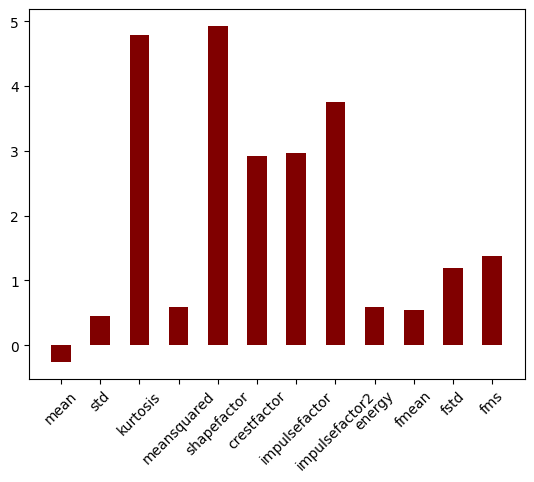

In [949]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.bar(df2.columns, z, color ='maroon',
        width = 0.5)

In [951]:
sf = df3[['kurtosis', 'shapefactor', 'crestfactor', 'impulsefactor', 'impulsefactor2', 'fstd']]
#sf = df3[['mean', 'std','kurtosis', 'energy', 'fftmean', 'fftstd']]
sf = sf.dropna(axis=0)
sf = sf.reset_index(drop=True)
sf.head()

,kurtosis,shapefactor,crestfactor,impulsefactor,impulsefactor2,fstd
0,0.022392,1.253927,5.214442,6.538528,3.876710,0.607074
1,0.009000,1.253722,5.064656,6.349699,3.619624,0.608695
2,0.012484,1.253968,5.014095,6.287510,3.654152,0.587535
3,0.019728,1.254371,5.082129,6.374953,3.772313,0.574545
4,0.024678,1.254572,5.066877,6.356813,3.779431,0.550567


## Dimension reduction

In [874]:
traindata = sf.values
traindata = traindata[:trainsize,:]
meant = np.mean(traindata,axis=0)
stdt = np.std(traindata,axis=0)
ntraindata = (traindata-meant)/stdt
pca = PCA(n_components=2)
pca.fit(ntraindata)
print(pca.components_)

[[ 0.45804777  0.45498711  0.45472392  0.45638506  0.37618833  0.1630955 ]
 [ 0.0062566  -0.0049862   0.05389656  0.05117187 -0.50229911  0.86145702]]


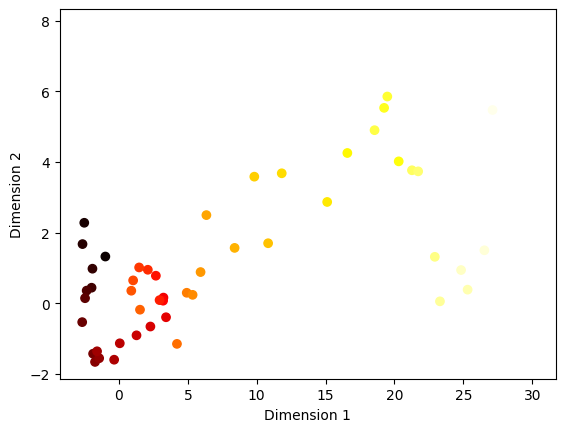

In [875]:
sfs = sf.values
pca1 = np.matmul((sfs - meant)/stdt, np.expand_dims(pca.components_[0,:], axis=1))
pca2 = np.matmul((sfs - meant)/stdt, np.expand_dims(pca.components_[1,:], axis=1))
colors = np.arange(1,51)
plt.scatter(pca1, pca2, c=colors, alpha=1)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## Health Indicator

Text(0, 0.5, 'Health Indicator')

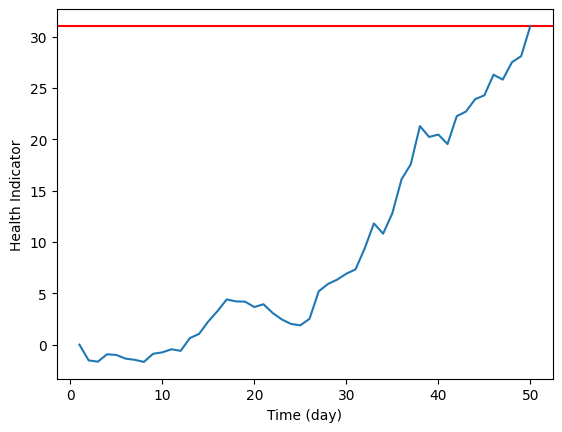

In [876]:
hi = pca1
hi = hi - hi[0]
thd = hi[-1]

plt.axhline(thd, color = 'r')
plt.plot(Time, hi)
plt.xlabel("Time (day)")
plt.ylabel("Health Indicator")

## Developing Exponential Digredation Model to Predict the RUL

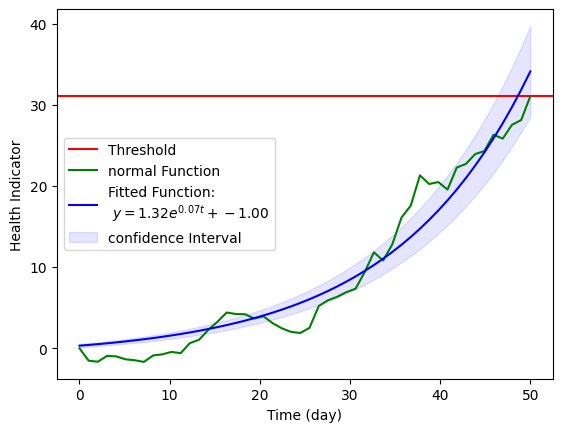

In [901]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c
def func2(x, a, b, c):
    return a + b * x + c * (x**2)
#def func3(x, a, b, c, d):
#    return a + b * x + c * (x**2) + d * (x**3)
tmin, tmax = 0, 50
num = 50
t = np.linspace(tmin, tmax, num)
popt, pcov = curve_fit(func, t, hi[:,0], p0=[1, 1, -1], bounds=(-1, [3, 1, 0.5]))
alpha, theta, beta = popt

popt2, pcov2 = curve_fit(func2, t, hi[:,0], p0=[1, 1, -1], bounds=(-4, 4))
alpha2, theta2, beta2 = popt2

#popt3, pcov3 = curve_fit(func3, t, hi[:,0], bounds=(-4, 4))
#alpha3, theta3, beta3, omega3 = popt3

#fit_y = func(t, 0.1, 0.1, -1)
fit_y = func(t, alpha, theta, beta)
fit_y_n = func(t, alpha-pcov[0,0], theta-pcov[1,1], beta)
fit_y_p = func(t, alpha+pcov[0,0], theta+pcov[1,1], beta)

fit_y2 = func2(t, alpha2, theta2, beta2)
#fit_y3 = func3(t, alpha3, theta3, beta3, omega3)

plt.axhline(thd, color = 'r',  label= 'Threshold')
plt.plot(t, hi, 'g-',label='normal Function')
plt.plot(t, fit_y, 'b-',
    label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (alpha, theta, beta))
#plt.plot(t, fit_y2, 'c-',
#    label='Fitted Function:\n $y = %0.2f + %0.2f*t + %0.2f*t^{2}$' % (alpha2, theta2, beta2))
#plt.plot(t, fit_y3, 'y-',
#    label='Fitted Function:\n $y = %0.2f + %0.2f*t + %0.2f*t^{2} + %0.2f*t^{3}$' % (alpha3, theta3, beta3, omega3))
plt.fill_between(t, fit_y_n, fit_y_p, color='b', alpha=.1,label='confidence Interval')
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Health Indicator")
plt.show()


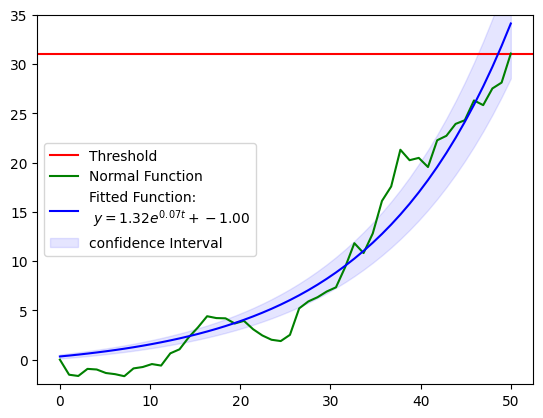

In [878]:
tmin, tmax = 0, 50
num = 50
t = np.linspace(tmin, tmax, num)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
for i in range(1,51):
    ax.set_xlim(0, 50)
    
    popt, pcov = curve_fit(func, t[:i], hi[:i,0], p0=[1, 1, -1], bounds=(-1, [3, 1, 0.5]))
    alpha, theta, beta = popt

    #fit_y = func(t[:i], 0.1, 0.1, -1)
    fit_y = func(t, alpha, theta, beta)
    fit_y_n = func(t, alpha-pcov[0,0], theta-pcov[1,1], beta)
    fit_y_p = func(t, alpha+pcov[0,0], theta+pcov[1,1], beta)
    ax.cla()
    ax.axhline(thd, color = 'r', label= 'Threshold')
    ax.plot(t[:i], hi[:i], 'g-',label='Normal Function')
    ax.plot(t, fit_y, 'b-',
        label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (alpha, theta, beta))
    ax.fill_between(t, fit_y_n, fit_y_p, color='b', alpha=.1,label='confidence Interval')
    ax.set_ylim(-2.5,35)
    ax.legend(loc='center left')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.02)


## Prediction of RUL

In [969]:
tmin, tmax = 0, 300
num = 300
t = np.linspace(tmin, tmax, num)
train_s = 35
prerul, prerul_n, prerul_p, prerul2, rult = [], [], [], [], []
for i in range(0,50):
    rult.append(Time[-1] - i)
    if i < train_s:
        prerul.append(Time[-1] - i)
    else:
        popt, pcov = curve_fit(func, t[:i], hi[:i,0], p0=[1, 1, -1], bounds=(-1, [3, 1, 0.5]))
        alpha, theta, beta = popt

        #fit_y = func(t[:i], 0.1, 0.1, -1)
        fit_y = func(t, alpha, theta, beta)
        fit_y_n = func(t, alpha-pcov[0,0], theta-pcov[1,1], beta)
        fit_y_p = func(t, alpha+pcov[0,0], theta+pcov[1,1], beta)

        #popt2, pcov2 = curve_fit(func2, t[:i], hi[:i,0], p0=[1, 1, -1], bounds=(-4, 4))
        #alpha2, theta2, beta2 = popt2
        #fit_y2 = func2(t, alpha2, theta2, beta2)

        prerul.append(Time[-1] - np.where(fit_y>thd)[0][0])
        #prerul2.append(Time[-1] - np.where(fit_y2>thd)[0][0])

        #prerul_n.append(Time[-1] - np.where(fit_y_n>thd)[0][0])
        #prerul_p.append(Time[-1] - np.where(fit_y_p>thd)[0][0])

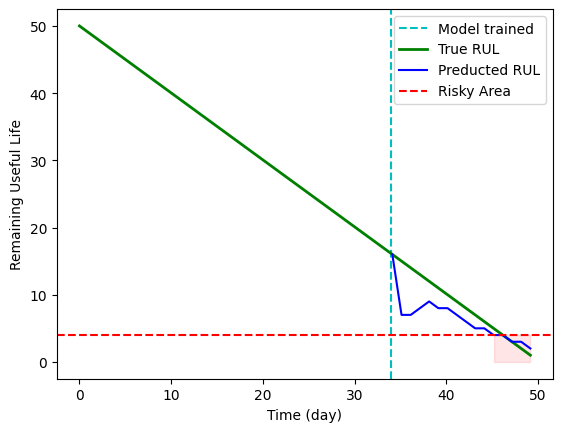

In [994]:
#plt.axvline(Time[-1], color = 'r', linestyle='--', label= 'Threshold')
plt.axvline(Time[train_s-2], color = 'c', linestyle='--', label= 'Model trained')
#plt.axvline(Time[-trainsize-1], color = 'y', linestyle='--', label= 'Train_PCA')
plt.plot(t[0:50], rult, 'g-',label='True RUL',linewidth=2)
plt.plot(t[34:50], prerul[34:50], 'b-',label='Preducted RUL')
plt.axhline(Time[-1] - np.where(fit_y>27)[0][0], color = 'r', linestyle='--', label= 'Risky Area')
plt.fill_between(t[45:50], 4, 0, color='r', alpha=.1)
#plt.plot(t[0:50], prerul2, 'y-',label='Preducted RUL(poly)')
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Remaining Useful Life")
plt.show()
